In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os


In [8]:
dir = r'C:\Users\_Kamat_\Desktop\RPI\ResearchWork\Papers_\Effective_Connectivity\EEG_fNIRS_paper_Brain_informatics\channelEEG_codes_results_alphaBand\Results\temp'
filename = 'RFE_compiled.xlsx'
file_path = os.path.join(dir, filename)
data_sheet = pd.read_excel(file_path, header = 0)
data = data_sheet.iloc[2:,2:]
data = np.array(data)

In [60]:
data[0,:]

connectivity = ['LPFC-->LPFC','LPFC-->RPFC','LPFC-->LPMC','LPFC-->RPMC','LPFC-->SMA','RPFC-->LPFC','RPFC-->RPFC','RPFC-->LPMC','RPFC-->RPMC','RPFC-->SMA','LPMC-->LPFC','LPMC-->RPFC','LPMC-->LPMC','LPMC-->RPMC','LPMC-->SMA','RPMC-->LPFC','RPMC-->RPFC','RPMC-->LPMC','RPMC-->RPMC','RPMC-->SMA','SMA-->LPFC','SMA-->RPFC','SMA-->LPMC','SMA-->RPMC','SMA-->SMA']

In [10]:
st1_rank = np.sort(data[0,:])
print(st1_rank)

[0.6911764705882353 0.6911764705882353 0.7058823529411765
 0.7058823529411765 0.7058823529411765 0.7058823529411765
 0.7205882352941176 0.7205882352941176 0.7205882352941176
 0.7205882352941176 0.7205882352941176 0.7352941176470589
 0.7352941176470589 0.7352941176470589 0.7352941176470589 0.75 0.75
 0.7647058823529411 0.7794117647058824 0.7794117647058824]


[[ 9  4  1 15 14 13 16  0  5  7 19  8 18 12  3 11 17  2 10  6]
 [10 17 11 14  7 15 19  8  5  3 12 13  1 16  4  2  6 18  0  9]
 [10  3 15 14 13 19 11  2 16  6  7  8 12 17  9  1 18  5  0  4]
 [ 9 17 13  5  7 11 16 14 12  0  8  4  3  2 18  6 15  1 19 10]
 [ 4  0  2  8 18 19  5  3  1 11 12 13 15 16  7 10 17  9  6 14]
 [ 4  9 11  7 10 17 15 13 12 19  8  6  2  1  3 14 16 18  0  5]
 [14  0  3  6 13  4 10  7 18  9  8  1 17  5 12 15 16 19 11  2]
 [17  7 12  9  2  4  5  6  8 18 10 14 13 15  0  3  1 11 16 19]
 [ 9 12  4  8  7 16 10 18  0  5  2 11 13 15  1 17  6 19  3 14]
 [14 13  8 12 19 17  5  6  7 18 15  9  4  3 16  2 11  1  0 10]
 [ 7  0 14  1  3  4  5 18 11 17 16 15 13  9 10  8  6 19 12  2]
 [ 1  2  3 18  4  6 16  8 10 13  0 17 14  9 11  7  5 12 19 15]
 [ 4  3  8  0 17 16 15 13 12 10  9  7  2  1 18 19  6  5 11 14]]


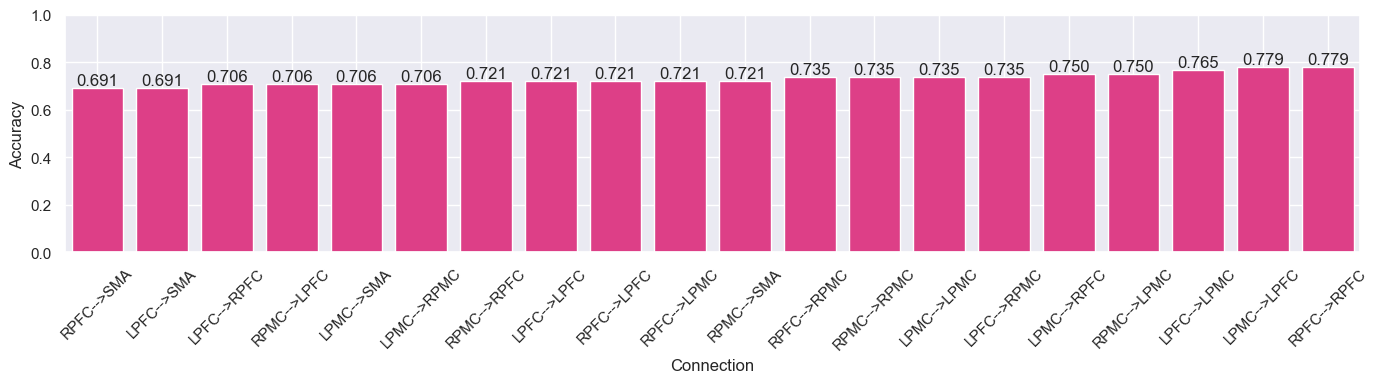

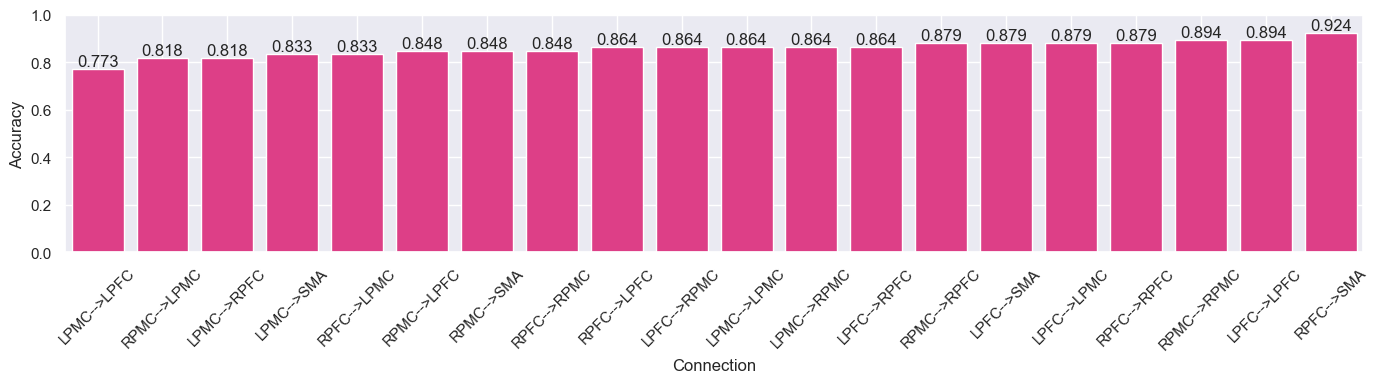

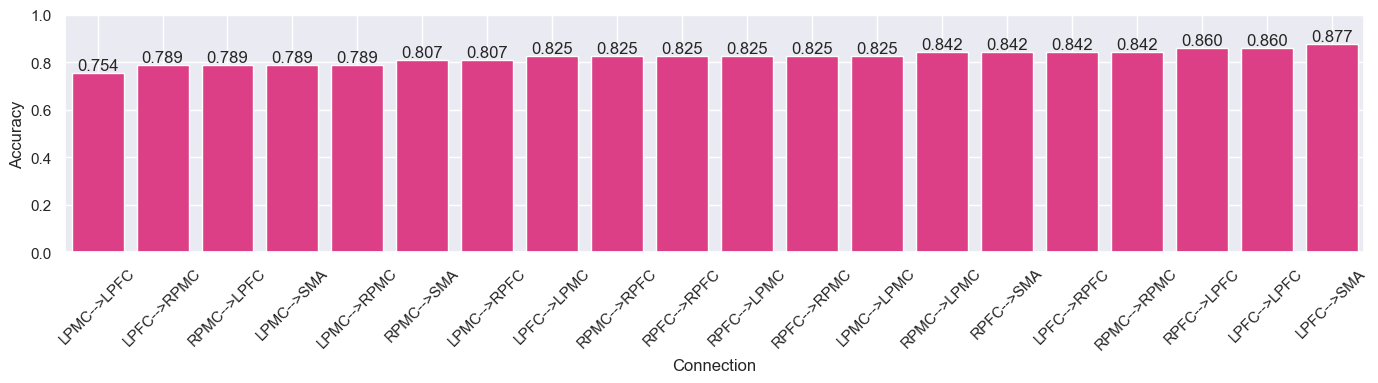

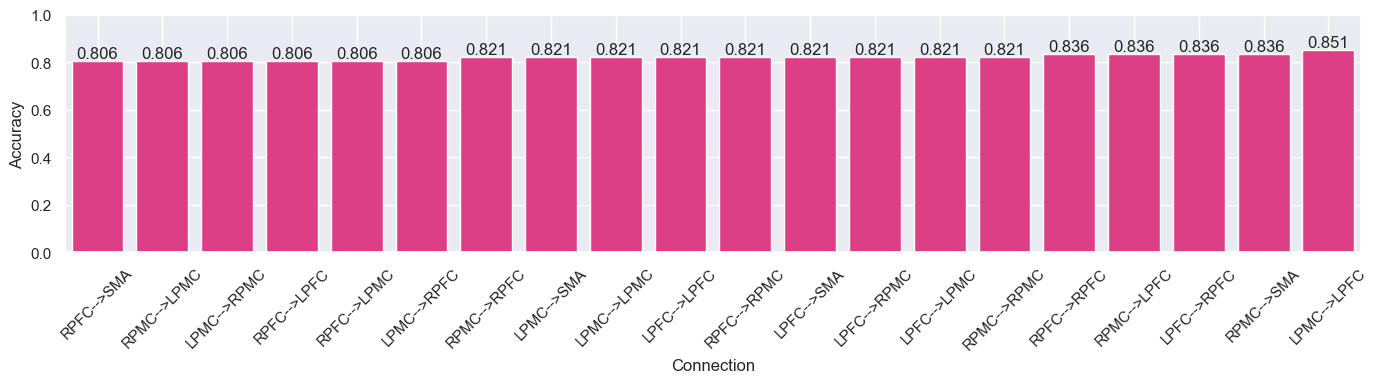

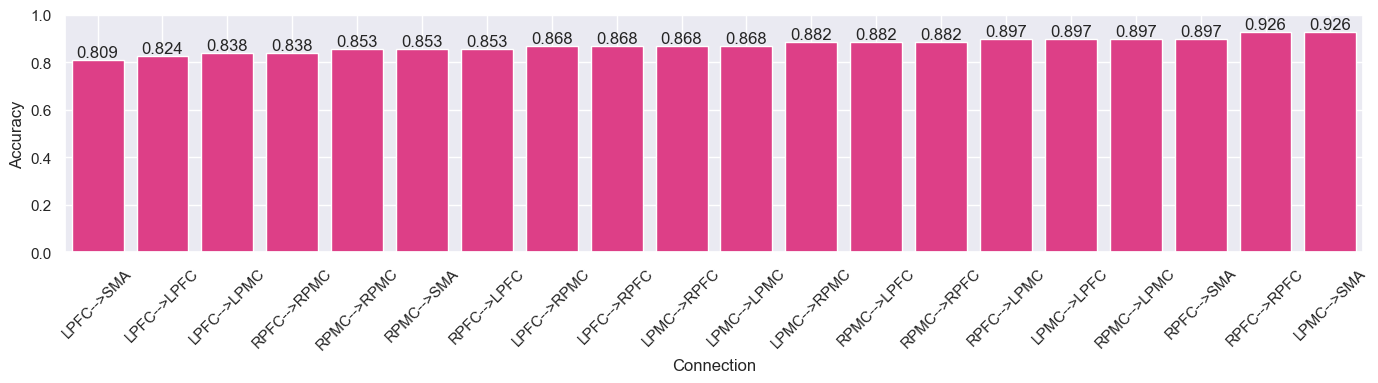

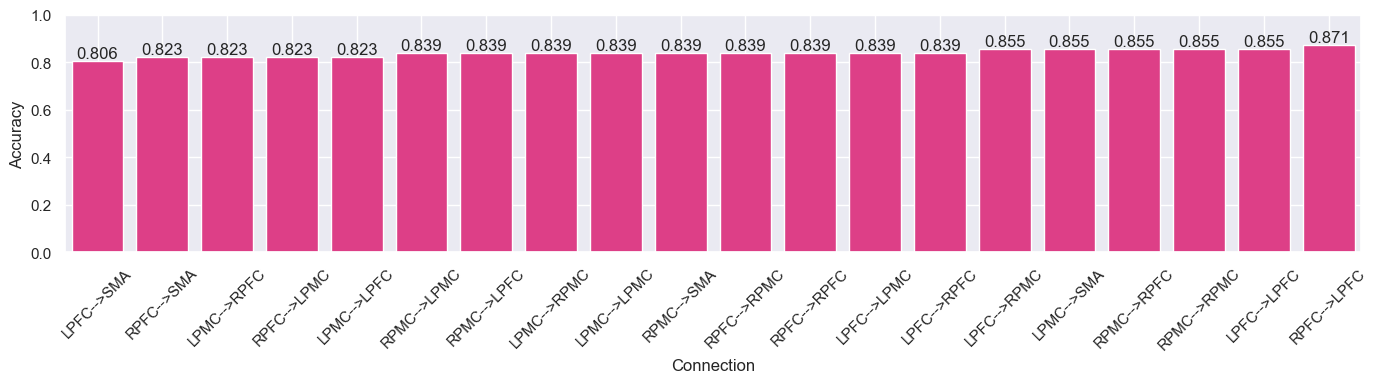

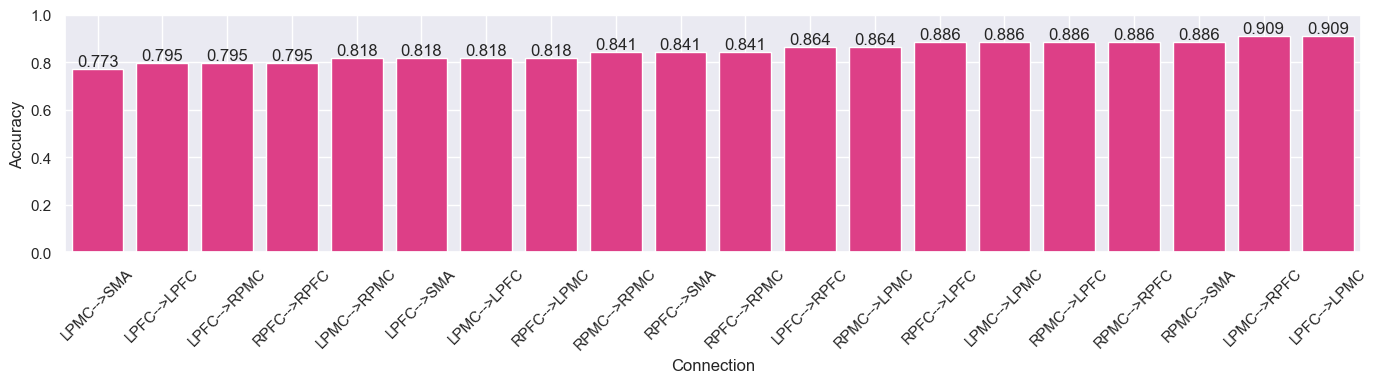

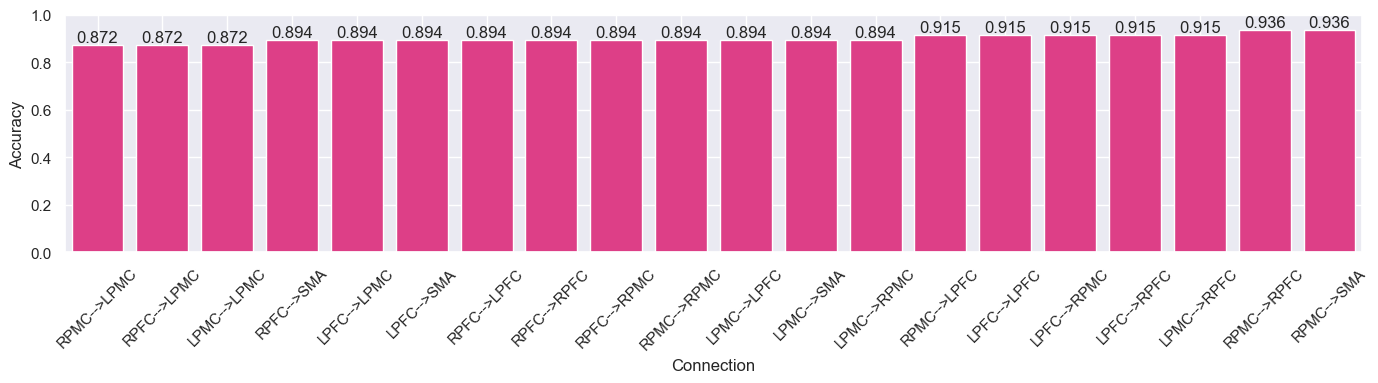

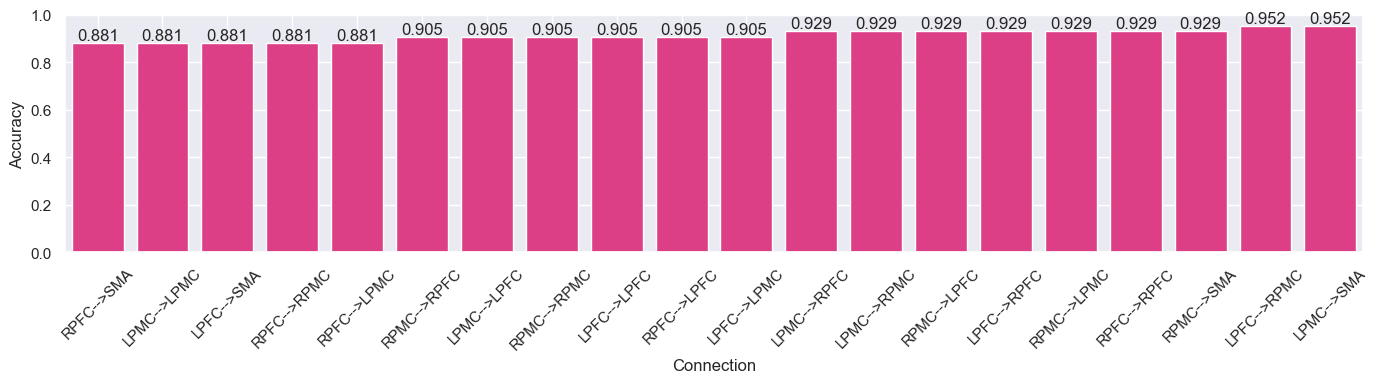

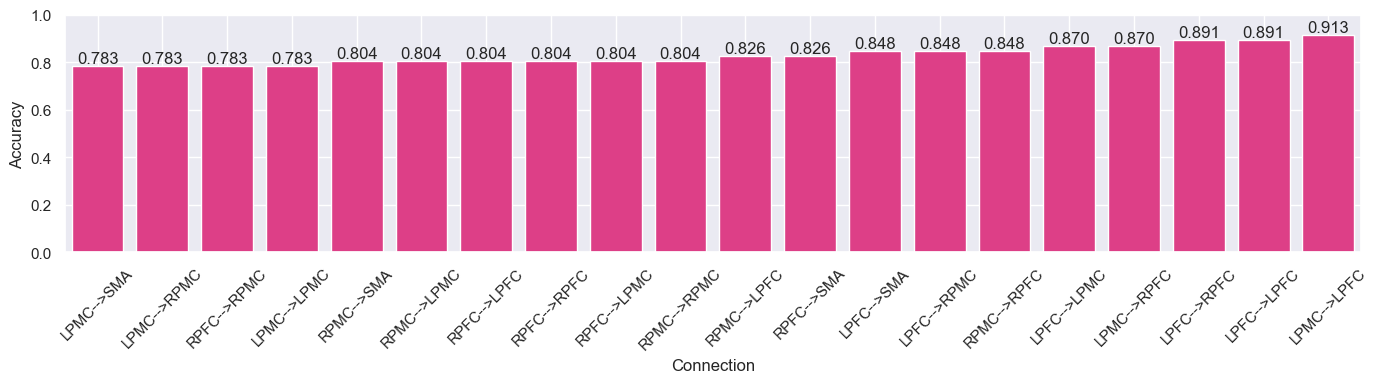

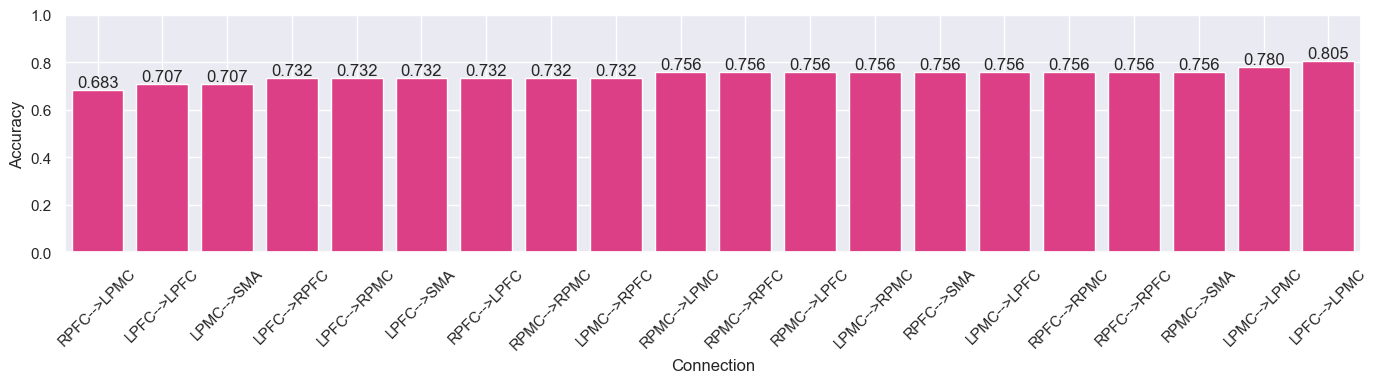

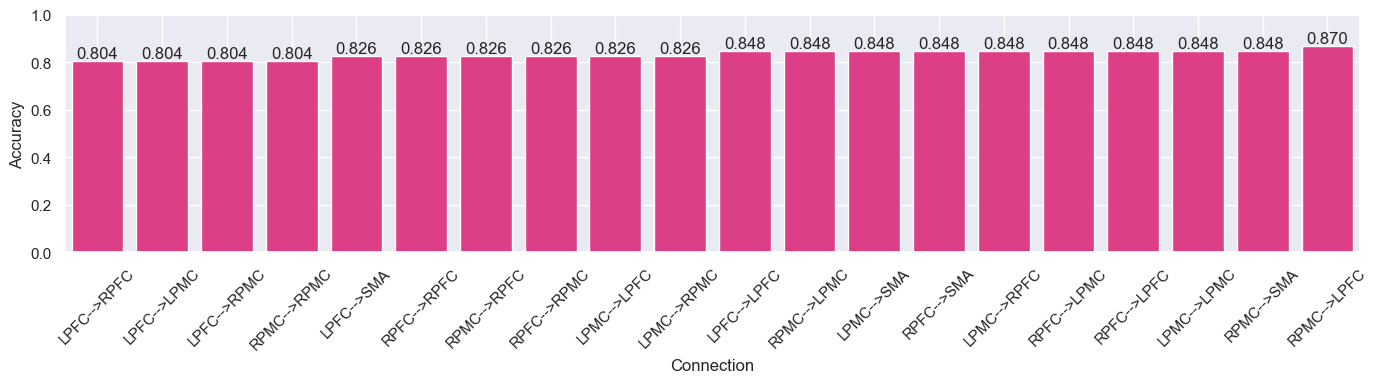

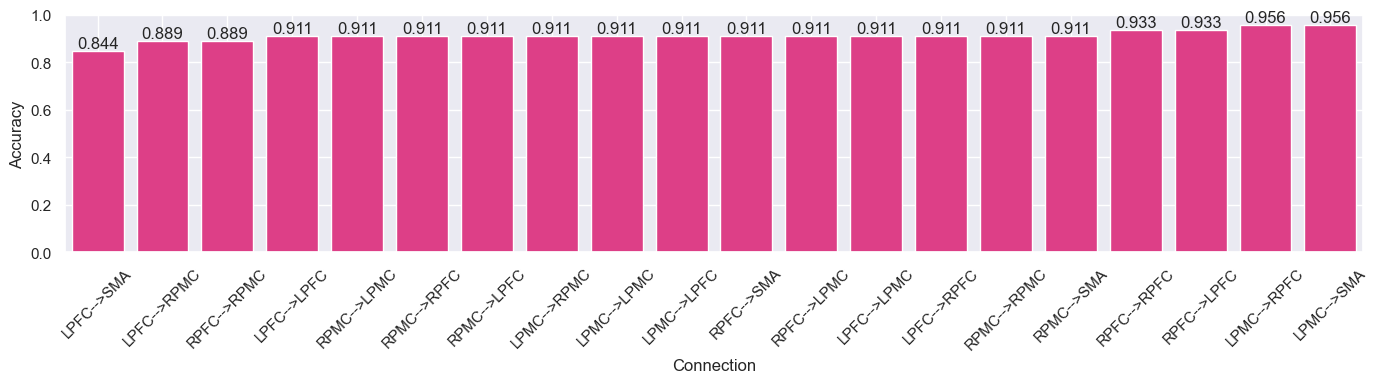

In [146]:
rank = np.array(data.argsort(axis=1))
print(rank)
for st in range(13):
    data0 = data[st,:]
    ranked0 = data0[rank[st,:]]
    #print(ranked0)
    selected_conn = [connectivity[i] for i in rank[st,:]]
    print(selected_conn[0:3])
    df = pd.DataFrame({'Connection': selected_conn, 'Accuracy': ranked0 })
    figName= 'Subtask_'+str(st+1)+'_RFE'+'.png'
    plt.rcParams["font.size"] = 12
    plt.figure(figsize=(14,4))
    ax = sns.barplot(x = 'Connection', y = 'Accuracy', data = df, color = '#F72585')
    # ax.bar_label(ax.containers[0])
    for container in ax.containers:
        ax.bar_label(container, fmt='%.3f')
    plt.xticks(rotation = 45)
    plt.ylim((0,1))
    plt.tight_layout()
    plt.grid(True)
    plt.savefig(figName)
    plt.show()
    #plt.close()

    #plt.barh